# Calculate the Rt: Curt Model

In [1]:
import os
import time
import math
import json
import random
import datetime
import dateutil
import pathlib
import argparse

from functools import reduce

from tqdm import tqdm

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

print('* loaded packages')

* loaded packages


In [2]:
DS_USAFACT_US_CONFIRMED = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv'
DS_USAFACT_US_DEATH = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv'

# the state level data
DS_COVIDTRACKING_STATE = 'https://covidtracking.com/data/download/all-states-history.csv'

# the usa level data
DS_COVIDTRACKING_USA = 'https://covidtracking.com/data/download/national-history.csv'

print('* defined data sources')

* defined data sources


In [3]:
usa_data = pd.read_csv(DS_COVIDTRACKING_USA)
print('* loaded usa data')

* loaded usa data


In [3]:
covid_data = pd.read_csv(DS_USAFACT_US_CONFIRMED)
death_data = pd.read_csv(DS_USAFACT_US_DEATH)
print('* loaded data')

In [5]:
covid_data.set_index('countyFIPS', inplace=True)
death_data.set_index('countyFIPS', inplace=True)
print('* set index')

* set index


In [5]:
usa_data.date.max()

'2020-11-11'

In [6]:
covid_data.head()

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,842,857,865,886,905,921,932,942,974,974
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,1937,2013,2102,2196,2461,2513,2662,2708,2835,2835
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,495,503,514,518,534,539,552,562,575,575
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,269,279,283,287,289,303,318,324,337,338


In [8]:
covid_data.loc[27109, covid_data.columns[3:]]

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
7/24/20    1487
7/25/20    1497
7/26/20    1515
7/27/20    1525
7/28/20    1531
Name: 27109, Length: 189, dtype: object

In [32]:
covid_data.loc[27109, covid_data.columns[3:]].diff()

1/22/20    NaN
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
7/24/20     21
7/25/20     10
7/26/20     18
7/27/20     10
7/28/20      6
Name: 27109, Length: 189, dtype: object

In [9]:
covid_data.loc[27109, covid_data.columns[3:]].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 6, 11, 12, 14, 16, 18, 21,
       29, 34, 37, 47, 51, 53, 61, 66, 76, 88, 95, 96, 103, 108, 114, 114,
       132, 143, 143, 147, 153, 163, 174, 177, 194, 197, 198, 204, 213,
       219, 238, 239, 246, 251, 256, 265, 269, 282, 293, 305, 313, 322,
       336, 351, 363, 368, 374, 378, 385, 399, 417, 435, 448, 461, 479,
       488, 493, 525, 542, 551, 562, 570, 575, 582, 594, 608, 626, 634,
       650, 654, 672, 689, 699, 711, 722, 727, 740, 752, 765, 775, 778,
       778, 781, 810, 832, 846, 869, 903, 910, 916, 938, 948, 970, 998,
       1020, 1027, 1047, 1058, 1076, 1101, 1101, 1124, 1129, 1147, 1168,
       1196, 1235, 1259, 1276, 1302, 1319, 1336, 1353, 1379, 1388, 1400,
       1403, 1436, 1448, 1466, 1487, 1497, 1515, 1525, 1531], dtype=object)

In [11]:
td = covid_data.loc[27109, covid_data.columns[3:]].values[1:]
yd = covid_data.loc[27109, covid_data.columns[3:]].values[:-1]

td - yd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 5, 1, 2, 2, 2, 3, 8, 5, 3,
       10, 4, 2, 8, 5, 10, 12, 7, 1, 7, 5, 6, 0, 18, 11, 0, 4, 6, 10, 11,
       3, 17, 3, 1, 6, 9, 6, 19, 1, 7, 5, 5, 9, 4, 13, 11, 12, 8, 9, 14,
       15, 12, 5, 6, 4, 7, 14, 18, 18, 13, 13, 18, 9, 5, 32, 17, 9, 11, 8,
       5, 7, 12, 14, 18, 8, 16, 4, 18, 17, 10, 12, 11, 5, 13, 12, 13, 10,
       3, 0, 3, 29, 22, 14, 23, 34, 7, 6, 22, 10, 22, 28, 22, 7, 20, 11,
       18, 25, 0, 23, 5, 18, 21, 28, 39, 24, 17, 26, 17, 17, 17, 26, 9,
       12, 3, 33, 12, 18, 21, 10, 18, 10, 6], dtype=object)

In [12]:
dnc = td - yd
ncc = td

dnc / ncc

/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 0.0, 0.0,
       0.0, 0.6666666666666666, 0.0, 0.0, 0.5, 0.45454545454545453,
       0.08333333333333333, 0.14285714285714285, 0.125,
       0.1111111111111111, 0.14285714285714285, 0.27586206896551724,
       0.14705882352941177, 0.08108108108108109, 0.2127659574468085,
       0.0784313725490196, 0.03773584905660377, 0.13114754098360656,
       0.07575757575757576, 0.13157894736842105, 0.13636363636363635,
       0.07368421052631578, 0.010416666666666666, 0.06796116504854369,
       0.046296296296296294, 0.05263157894736842, 0.0,
       0.13636363636363635, 0.07692307692307693, 0.0,
       0.027210884353741496, 0.0392156862745098, 0.06134969325153374,
       0.06321839080459771, 0.01694915254237288, 0.0876288659

In [14]:
dt = dnc / ncc * 14

/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [15]:
dt

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 14.0, 0.0, 0.0,
       0.0, 9.333333333333332, 0.0, 0.0, 7.0, 6.363636363636363,
       1.1666666666666665, 2.0, 1.75, 1.5555555555555554, 2.0,
       3.862068965517241, 2.058823529411765, 1.135135135135135,
       2.978723404255319, 1.0980392156862746, 0.5283018867924528,
       1.8360655737704918, 1.0606060606060606, 1.8421052631578947,
       1.909090909090909, 1.031578947368421, 0.14583333333333331,
       0.9514563106796117, 0.6481481481481481, 0.7368421052631579, 0.0,
       1.909090909090909, 1.076923076923077, 0.0, 0.38095238095238093,
       0.5490196078431373, 0.8588957055214724, 0.885057471264368,
       0.23728813559322035, 1.22680412371134, 0.2131979695431472,
       0.07070707070707072, 0.411764705882352

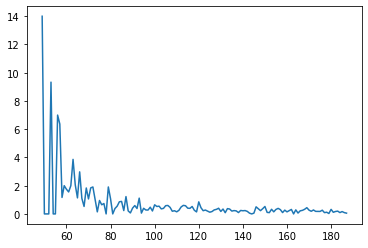

In [19]:
plt.plot(dt)

plt.show()

## Rt functions

In [21]:
def get_cnty_rt(countyFIPS, L=14):
    td = covid_data.loc[countyFIPS, covid_data.columns[3:]].values[1:]
    yd = covid_data.loc[countyFIPS, covid_data.columns[3:]].values[:-1]
    
    dnc = td - yd
    ncc = td
    
    rt = dnc / ncc * L
    
    return rt
    
def plot_rt(rt):
    fig, ax = plt.subplots()
    
    ax.plot(rt)
    ax.set_ylim(0, 3)

    plt.show()


/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


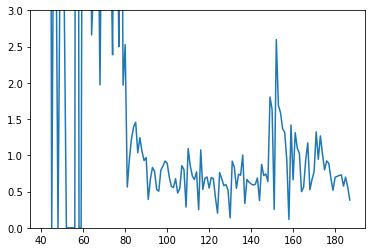

In [27]:
plot_rt(get_cnty_rt(48201, 30))

In [33]:
get_cnty_rt(48201)

/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, 14.0, 4.666666666666666, 5.6000000000000005, 0.0,
       2.333333333333333, 2.0, 0.0, 1.75, 1.5555555555555554,
       1.4000000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 10.11111111111111,
       0.0, 0.0, 4.666666666666666, 4.4303797468354436, 4.705882352941177,
       4.994594594594595, 1.2413793103448276, 1.5895196506550218,
       6.795505617977528, 2.155893536121673, 0.9200710479573713,
       2.4088235294117646, 2.760330578512397, 1.5832460732984295,
       1.9113924050632913, 1.940809968847352, 1.113978494623656,
       3.2039800995024876, 2.1985088536812674, 1.1661683041435285,
       3.24384640630128, 0.9187365838699786, 1.1794439764111204,
       0.262331220721962, 0.44088604216706695, 0.5733299206552342,
       0.6492555528435441, 0.67951695308871

/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


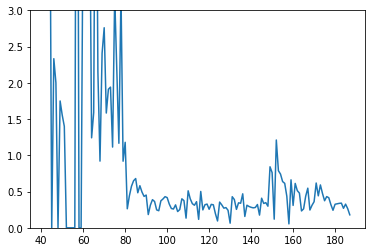

In [42]:
plot_rt(get_cnty_rt(48201, 14))

/Users/m210842/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


(0, 2)

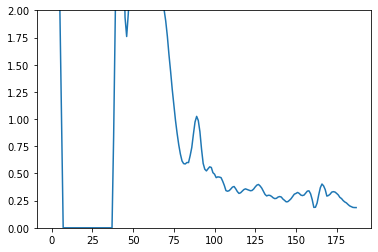

In [45]:
ax = pd.Series(get_cnty_rt(6037, 12)).rolling(
    7, win_type='gaussian', min_periods=1, center=True
).mean(std=2).plot()

ax.set_ylim([0, 2])